<a href="https://colab.research.google.com/github/ViniciusPezatti/ViniciusPezatti/blob/main/Desafio_6_Classifica%C3%A7%C3%A3o_e_Regress%C3%A3o_Vinicius.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Etapa 01) Análise exploratória dos dados (Data Understanding)

##Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Lendo arquivo CSV

In [ ]:
df = pd.read_csv('streaming_data.csv')

##Informações do profit do Desafio

In [ ]:
#De acodo com a descrição do desafio
#Coluna                 Descrição                                                   Tipo

#client_id              - Código de identificação do cliente                        - Int
#age                    - Idade do cliente                                          - Int
#gender                 - Gênero do cliente                                         - String
#region                 - Região de origem do cliente                               - String
#subscription_days      - Dias de assinatura ativa do cliente                       - Int
#subscription_type      - Tipo de conta                                             - String
#num_contents           - Quantidade de conteúdos assistidos                        - Int
#avg_rating             - Avaliação média dos conteúdos da plataforma               - Int
#num_active_profiles    - Número de perfis ativos na plataforma                     - Int
#num_streaming_services - Quantidade de serviços de streaming que o cliente possui  - Int
#devices_connected      - Quantidade de dispositivos conectados à conta             - Int
#churned                - Se o cliente cancelou a conta ou não                      - Int

verificando os dados recebidos

In [ ]:
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


###Informações analisadas da planilha CSV baixada

In [ ]:
#Existente na planilha real
#Coluna                 Descrição                                                   Tipo         Ação

#age                    - Idade do cliente                                          - float    - passar para int
#gender                 - Gênero do cliente                                         - String   - passar para boleano 1 e 0
#Time_on_platform       - Dias de assinatura ativa do cliente                       - float    - passar para int
#Devices_connected      - Quantidade de dispositivos conectados à conta             - float    - passar para int
#Subscription_type      - Tipo de conta                                             - String   - passar para boleano 1 e 0
#num_streaming_services - Quantidade de serviços de streaming que o cliente possui  - float    - passar para int
#num_active_profiles    - Número de perfis ativos na plataforma                     - Int      - manter
#avg_rating             - Avaliação média dos conteúdos da plataforma               - float    - manter
#churned                - Se o cliente cancelou a conta ou não                      - Int      - passar para boleano 1 e 0
#User_id                - Código de identificação do cliente                        - Int      - drop (não tem necessidade)

verificando tipos de informações e valores nulos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


#Etapa 02) Tratamento dos Dados (Data Preparation)

###Limpando linhas com valores nulos

usando fillna para completar valores nulos de algumas colunas

In [ ]:
df['Time_on_platform'] = df['Time_on_platform'].fillna(0)
df['Num_streaming_services'] = df['Num_streaming_services'].fillna(0)
df['Churned'] = df['Churned'].fillna(0)
df['Avg_rating'] = df['Avg_rating'].fillna(0)
df['Devices_connected'] = df['Devices_connected'].fillna(0)

dropando linhas com valores nulos de algumas colunas

In [ ]:
df = df.dropna(subset=['Gender', 'Subscription_type', 'Age'])

transformando 1 e 0 da Churned em No e Yes

In [ ]:
df['Churned'] = df['Churned'].replace({0: 'No', 1: 'Yes'})

<ipython-input-9-e2638a3c07ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churned'] = df['Churned'].replace({0: 'No', 1: 'Yes'})


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,36515.0,43.473422,15.092181,18.0,30.00,43.00,57.00,69.0
Time_on_platform,36515.0,3170.231576,2909.245246,0.0,0.00,2708.00,5741.00,8759.0
Devices_connected,36515.0,2.039628,1.820622,0.0,0.00,2.00,4.00,5.0
Num_streaming_services,36515.0,0.309434,0.909600,0.0,0.00,0.00,0.00,4.0
Num_active_profiles,36515.0,2.993455,1.412968,1.0,2.00,3.00,4.00,5.0
Avg_rating,36515.0,2.337959,1.609043,0.0,1.15,2.44,3.72,5.0


verificando se sobrou valores nulos

In [ ]:
df.isnull().count()

,0
Age,36515
Gender,36515
Time_on_platform,36515
Devices_connected,36515
Subscription_type,36515
Num_streaming_services,36515
Num_active_profiles,36515
Avg_rating,36515
Churned,36515
User_id,36515


##Análise gráfica

agrupando Churned por User_id

In [ ]:
df_agg = df.groupby('Churned')['User_id'].count().reset_index()
df_agg

,Churned,User_id
0,No,29459
1,Yes,7056


grafico de Churned por User_id

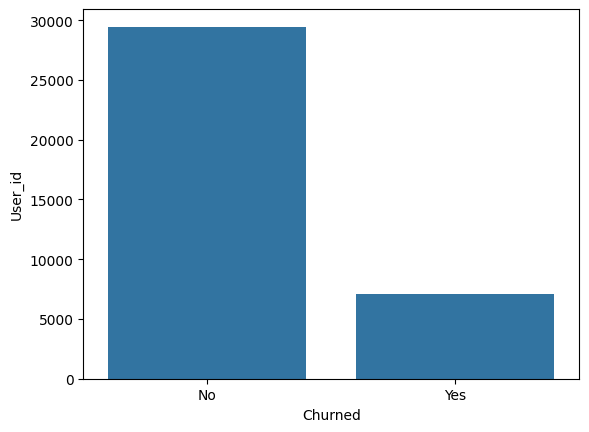

In [ ]:
sns.barplot(x='Churned', y='User_id', data=df_agg)
plt.show()

agrupando Gender por Use_id

In [ ]:
df_Gender = df.groupby('Gender')['User_id'].count().reset_index()
df_Gender


,Gender,User_id
0,Female,18149
1,Male,18366


gráfico de Gender por Use_id

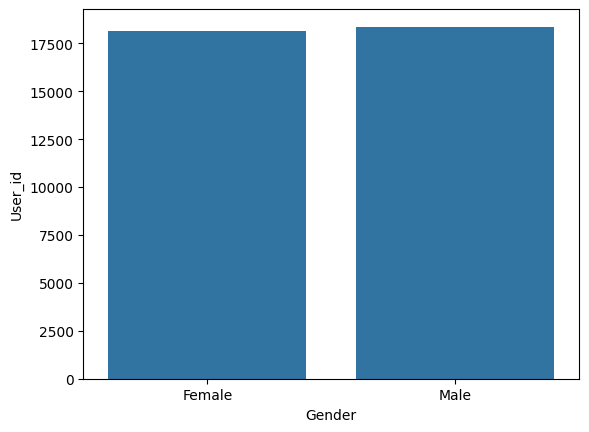

In [ ]:
sns.barplot(x='Gender', y='User_id', data=df_Gender)
plt.show()

agrupando Subscription_type por User_id

In [ ]:
df_type = df.groupby('Subscription_type')['User_id'].count().reset_index()
df_type

,Subscription_type,User_id
0,Basic,12134
1,Premium,12224
2,Standard,12157


gráfico de Subscription_type por User_id

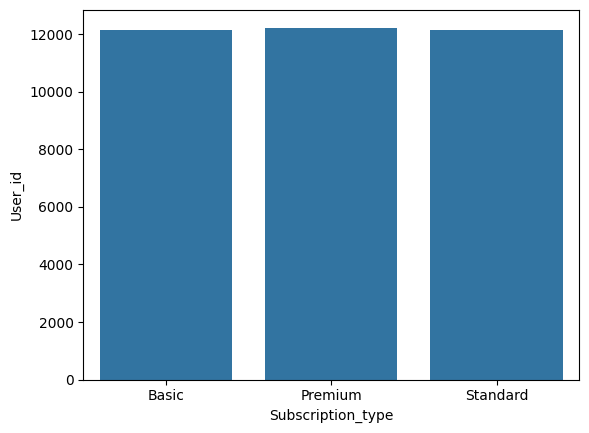

In [ ]:
sns.barplot(x='Subscription_type', y='User_id', data=df_type)
plt.show()

##Verificação dos dados, tratamento, limpeza e separação de target

separando X e y

In [ ]:
X = df.drop(columns=['User_id','Churned'], axis=1)
y = df[['Churned']]

verificando y

In [ ]:
y["Churned"].value_counts()

,count
Churned,
No,29459
Yes,7056


usando Label Encoder para transformar Churned em 1 e 0

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [ ]:
le.fit(y.Churned)
y.Churned = le.transform(y.Churned)

y.head()

<ipython-input-21-1493bf077922>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.Churned = le.transform(y.Churned)


,Churned
0,0
1,0
2,1
3,0
5,0


In [ ]:
y["Churned"].value_counts()

,count
Churned,
0,29459
1,7056


In [ ]:
# Convertendo colunas para os tipos de dados desejados

X['Age'] = df['Age'].astype(int)
X['Time_on_platform'] = df['Time_on_platform'].astype(int)
X['Devices_connected'] = df['Devices_connected'].astype(int)
X['Num_streaming_services'] = df['Num_streaming_services'].astype(int)

usando get_dummies

In [ ]:
# Convertendo colunas categóricas para numéricas (se necessário):

X = pd.get_dummies(X, columns=['Gender','Subscription_type']).astype(int)

In [ ]:
X.head()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard
0,49,4700,3,0,3,0,0,1,1,0,0
1,69,6107,2,0,1,2,1,0,0,0,1
2,44,6374,3,1,1,1,0,1,0,1,0
3,26,0,5,0,2,0,0,1,1,0,0
5,54,3024,2,0,1,0,0,1,1,0,0


##MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()


In [ ]:
X = pd.DataFrame(mm.fit_transform(X), columns=X.columns, index=X.index)

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((29212, 11), (7303, 11), (29212, 1), (7303, 1))

#Etapa 03) Modelagem dos Dados - Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()

lr = model_lr.fit(X_train, y_train)

lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X_test.assign(Churned=y_test).assign(label = lr.predict(X_test))

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard,Churned,label
25295,0.490196,0.706131,0.6,0.0,0.75,0.0,0.0,1.0,1.0,0.0,0.0,0,0
27047,0.980392,0.492636,0.6,0.0,0.75,0.8,1.0,0.0,0.0,0.0,1.0,0,0
74738,0.274510,0.097500,0.0,0.0,0.00,0.0,1.0,0.0,1.0,0.0,0.0,1,0
77654,0.411765,0.812992,0.0,0.0,0.25,0.0,1.0,0.0,0.0,0.0,1.0,1,0
40757,0.235294,0.303573,0.8,0.0,0.75,0.2,1.0,0.0,1.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41286,0.176471,0.000000,0.8,0.0,1.00,0.4,0.0,1.0,0.0,1.0,0.0,0,0
62981,0.470588,0.000000,0.0,0.0,0.50,0.2,1.0,0.0,1.0,0.0,0.0,0,0
75501,0.313725,0.715493,0.6,0.0,1.00,0.6,1.0,0.0,0.0,0.0,1.0,0,0
16565,0.941176,0.000000,0.2,0.0,0.50,0.4,0.0,1.0,1.0,0.0,0.0,0,0


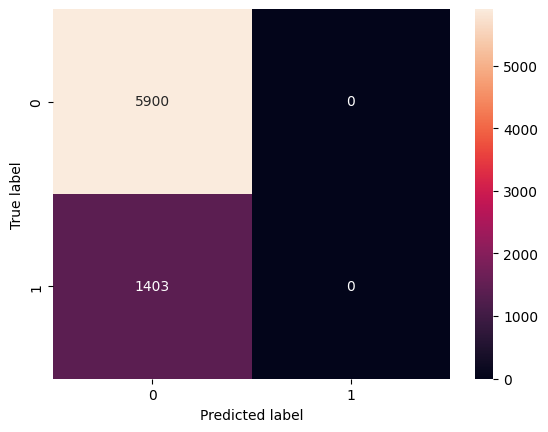

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_cm = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred_cm)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, balanced_accuracy_score, precision_score, recall_score

In [ ]:
print(f'Acurácia da regressao_logistica Treino: {accuracy_score(y_train, lr.predict(X_train)):.4f} %')
print(f'Acurácia da regressao_logistica Teste: {accuracy_score(y_test, lr.predict(X_test)):.4f} %')
print('===============================================')
print(f'Acurácia Balanceada da regressao_logistica Treino: {balanced_accuracy_score(y_train, lr.predict(X_train)):.4f} %')
print(f'Acurácia Balanceada da regressao_logistica Teste: {balanced_accuracy_score(y_test, lr.predict(X_test)):.4f} %')
print('===============================================')
print(f'Precisão da regressao_logistica Treino: {precision_score(y_train, lr.predict(X_train)):.4f} %')
print(f'Precisão da regressao_logistica Teste: {precision_score(y_test, lr.predict(X_test)):.4f} %')
print('===============================================')
print(f'Recall da regressao_logistica Treino: {recall_score(y_train, lr.predict(X_train)):.4f} %')
print(f'Recall da regressao_logistica Teste: {recall_score(y_test, lr.predict(X_test)):.4f} %')
print('===============================================')
print(f'F1 da regressao_logistica Treino: {f1_score(y_train, lr.predict(X_train)):.4f} %')
print(f'F1 da regressao_logistica Teste: {f1_score(y_test, lr.predict(X_test)):.4f} %')
print('===============================================')
print(f'ROC AUC da regressao_logistica Treino: {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1]):.4f} %')
print(f'ROC AUC da regressao_logistica Teste: {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]):.4f} %')

Acurácia da regressao_logistica Treino: 0.8065 %
Acurácia da regressao_logistica Teste: 0.8079 %
Acurácia Balanceada da regressao_logistica Treino: 0.5000 %
Acurácia Balanceada da regressao_logistica Teste: 0.5000 %
Precisão da regressao_logistica Treino: 0.0000 %
Precisão da regressao_logistica Teste: 0.0000 %
Recall da regressao_logistica Treino: 0.0000 %
Recall da regressao_logistica Teste: 0.0000 %
F1 da regressao_logistica Treino: 0.0000 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 da regressao_logistica Teste: 0.0000 %
ROC AUC da regressao_logistica Treino: 0.5127 %
ROC AUC da regressao_logistica Teste: 0.5065 %


#Etapa 04) Modelagem dos Dados - Tunning


### Irei utilizar o XG Boost para modelar e depois fazer tunnig

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

In [ ]:
X_test.assign(Churned=y_test).assign(label = xgb.predict(X_test))

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard,Churned,label
25295,0.490196,0.706131,0.6,0.0,0.75,0.0,0.0,1.0,1.0,0.0,0.0,0,0
27047,0.980392,0.492636,0.6,0.0,0.75,0.8,1.0,0.0,0.0,0.0,1.0,0,0
74738,0.274510,0.097500,0.0,0.0,0.00,0.0,1.0,0.0,1.0,0.0,0.0,1,1
77654,0.411765,0.812992,0.0,0.0,0.25,0.0,1.0,0.0,0.0,0.0,1.0,1,0
40757,0.235294,0.303573,0.8,0.0,0.75,0.2,1.0,0.0,1.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41286,0.176471,0.000000,0.8,0.0,1.00,0.4,0.0,1.0,0.0,1.0,0.0,0,0
62981,0.470588,0.000000,0.0,0.0,0.50,0.2,1.0,0.0,1.0,0.0,0.0,0,0
75501,0.313725,0.715493,0.6,0.0,1.00,0.6,1.0,0.0,0.0,0.0,1.0,0,0
16565,0.941176,0.000000,0.2,0.0,0.50,0.4,0.0,1.0,1.0,0.0,0.0,0,0


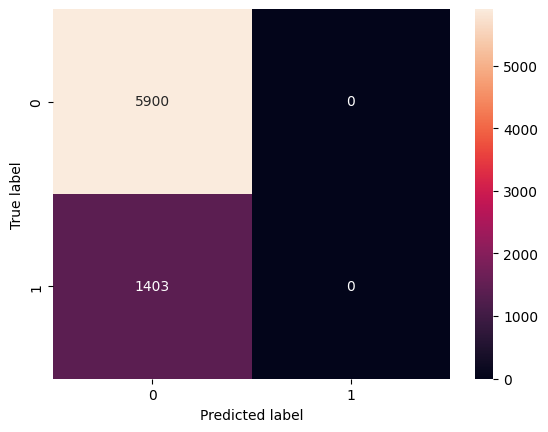

In [ ]:
y_pred_xgb = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
print(f'Acurácia da xgb Treino: {accuracy_score(y_train, xgb.predict(X_train)):.4f} %')
print(f'Acurácia da xgb Teste: {accuracy_score(y_test, xgb.predict(X_test)):.4f} %')
print('===============================================')
print(f'Acurácia Balanceada da xgb Treino: {balanced_accuracy_score(y_train, xgb.predict(X_train)):.4f} %')
print(f'Acurácia Balanceada da xgb Teste: {balanced_accuracy_score(y_test, xgb.predict(X_test)):.4f} %')
print('===============================================')
print(f'Precisão da xgb Treino: {precision_score(y_train, xgb.predict(X_train)):.4f} %')
print(f'Precisão da xgb Teste: {precision_score(y_test, xgb.predict(X_test)):.4f} %')
print('===============================================')
print(f'Recall da xgb Treino: {recall_score(y_train, xgb.predict(X_train)):.4f} %')
print(f'Recall da xgb Teste: {recall_score(y_test, xgb.predict(X_test)):.4f} %')
print('===============================================')
print(f'F1 da xgb Treino: {f1_score(y_train, xgb.predict(X_train)):.4f} %')
print(f'F1 da xgb Teste: {f1_score(y_test, xgb.predict(X_test)):.4f} %')
print('===============================================')
print(f'ROC AUC da xgb Treino: {roc_auc_score(y_train, xgb.predict_proba(X_train)[:,1]):.4f} %')
print(f'ROC AUC da xgb Teste: {roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1]):.4f} %')

Acurácia da xgb Treino: 0.8287 %
Acurácia da xgb Teste: 0.8088 %
Acurácia Balanceada da xgb Treino: 0.5584 %
Acurácia Balanceada da xgb Teste: 0.5125 %
Precisão da xgb Treino: 0.9779 %
Precisão da xgb Teste: 0.5432 %
Recall da xgb Treino: 0.1175 %
Recall da xgb Teste: 0.0314 %
F1 da xgb Treino: 0.2097 %
F1 da xgb Teste: 0.0593 %
ROC AUC da xgb Treino: 0.8583 %
ROC AUC da xgb Teste: 0.5766 %


## Grid Search - Tunned


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [200, 300, 400],
    'learning_rate': [0.01],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.8]
  }

grid_search_xgb = GridSearchCV(xgb, parameters, scoring='roc_auc', cv=5, n_jobs=-1)

grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8], 'learning_rate': [0.01],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 2, 3],
                         'n_estimators': [200, 300, 400],
                         'subsample': [0.7, 0.8]},
             scoring='roc_auc')

In [ ]:
grid_search_xgb.best_estimator_.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.8,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.01,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 5,
 'max_leaves': None,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 400,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.8,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
xgb_tunned = XGBClassifier(
                  objective= 'binary:logistic',
                  base_score= None,
                  booster= None,
                  callbacks= None,
                  colsample_bylevel= None,
                  colsample_bynode= None,
                  colsample_bytree= 0.8,
                  device= None,
                  early_stopping_rounds= None,
                  enable_categorical= False,
                  eval_metric= None,
                  feature_types= None,
                  gamma= None,
                  grow_policy= None,
                  importance_type= None,
                  interaction_constraints= None,
                  learning_rate= 0.01,
                  max_bin= None,
                  max_cat_threshold= None,
                  max_cat_to_onehot= None,
                  max_delta_step= None,
                  max_depth= 5,
                  max_leaves= None,
                  min_child_weight= 1,
                  monotone_constraints= None,
                  multi_strategy= None,
                  n_estimators= 400,
                  n_jobs= None,
                  num_parallel_tree= None,
                  random_state= None,
                  reg_alpha= None,
                  reg_lambda= None,
                  sampling_method= None,
                  scale_pos_weight= None,
                  subsample= 0.8,
                  tree_method= None,
                  validate_parameters= None,
                  verbosity= None
                  )

xgb_tunned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
print(f'Acurácia da xgb_tunned Treino: {accuracy_score(y_train, xgb_tunned.predict(X_train)):.4f} %')
print(f'Acurácia da xgb_tunned Teste: {accuracy_score(y_test, xgb_tunned.predict(X_test)):.4f} %')
print('===============================================')
print(f'Acurácia Balanceada da xgb_tunned Treino: {balanced_accuracy_score(y_train, xgb_tunned.predict(X_train)):.4f} %')
print(f'Acurácia Balanceada da xgb_tunned Teste: {balanced_accuracy_score(y_test, xgb_tunned.predict(X_test)):.4f} %')
print('===============================================')
print(f'Precisão da xgb_tunned Treino: {precision_score(y_train, xgb_tunned.predict(X_train)):.4f} %')
print(f'Precisão da xgb_tunned Teste: {precision_score(y_test, xgb_tunned.predict(X_test)):.4f} %')
print('===============================================')
print(f'Recall da xgb_tunned Treino: {recall_score(y_train, xgb_tunned.predict(X_train)):.4f} %')
print(f'Recall da xgxgb_tunnedb Teste: {recall_score(y_test, xgb_tunned.predict(X_test)):.4f} %')
print('===============================================')
print(f'F1 da xgb_tunned Treino: {f1_score(y_train, xgb_tunned.predict(X_train)):.4f} %')
print(f'F1 da xgb_tunned Teste: {f1_score(y_test, xgb_tunned.predict(X_test)):.4f} %')
print('===============================================')
print(f'ROC AUC da xgb_tunned Treino: {roc_auc_score(y_train, xgb_tunned.predict_proba(X_train)[:,1]):.4f} %')
print(f'ROC AUC da xgb_tunned Teste: {roc_auc_score(y_test, xgb_tunned.predict_proba(X_test)[:,1]):.4f} %')

Acurácia da xgb_tunned Treino: 0.8065 %
Acurácia da xgb_tunned Teste: 0.8079 %
Acurácia Balanceada da xgb_tunned Treino: 0.5000 %
Acurácia Balanceada da xgb_tunned Teste: 0.5000 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precisão da xgb_tunned Treino: 0.0000 %
Precisão da xgb_tunned Teste: 0.0000 %
Recall da xgb_tunned Treino: 0.0000 %
Recall da xgxgb_tunnedb Teste: 0.0000 %
F1 da xgb_tunned Treino: 0.0000 %
F1 da xgb_tunned Teste: 0.0000 %
ROC AUC da xgb_tunned Treino: 0.6743 %
ROC AUC da xgb_tunned Teste: 0.5396 %


#Etapa 05) Modelagem dos Dados - Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

rf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
X_test.assign(Churn=y_test).assign(label = rf.predict(X_test))

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard,Churn,label
25295,0.490196,0.706131,0.6,0.0,0.75,0.0,0.0,1.0,1.0,0.0,0.0,0,0
27047,0.980392,0.492636,0.6,0.0,0.75,0.8,1.0,0.0,0.0,0.0,1.0,0,0
74738,0.274510,0.097500,0.0,0.0,0.00,0.0,1.0,0.0,1.0,0.0,0.0,1,1
77654,0.411765,0.812992,0.0,0.0,0.25,0.0,1.0,0.0,0.0,0.0,1.0,1,1
40757,0.235294,0.303573,0.8,0.0,0.75,0.2,1.0,0.0,1.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41286,0.176471,0.000000,0.8,0.0,1.00,0.4,0.0,1.0,0.0,1.0,0.0,0,0
62981,0.470588,0.000000,0.0,0.0,0.50,0.2,1.0,0.0,1.0,0.0,0.0,0,0
75501,0.313725,0.715493,0.6,0.0,1.00,0.6,1.0,0.0,0.0,0.0,1.0,0,0
16565,0.941176,0.000000,0.2,0.0,0.50,0.4,0.0,1.0,1.0,0.0,0.0,0,0


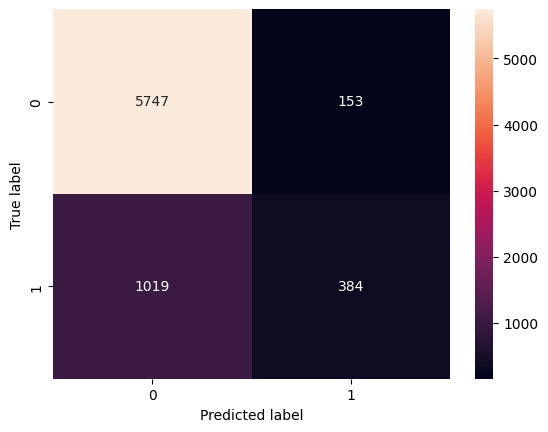

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_confusion_matrix_rf = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_confusion_matrix_rf)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
print(f'Acurácia da rf Treino: {accuracy_score(y_train, rf.predict(X_train)):.4f} %')
print(f'Acurácia da rf Teste: {accuracy_score(y_test, rf.predict(X_test)):.4f} %')
print('===============================================')
print(f'Acurácia Balanceada da rf Treino: {balanced_accuracy_score(y_train, lr.predict(X_train)):.4f} %')
print(f'Acurácia Balanceada da rf Teste: {balanced_accuracy_score(y_test, lr.predict(X_test)):.4f} %')
print('===============================================')
print(f'Precisão da rf Treino: {precision_score(y_train, rf.predict(X_train)):.4f} %')
print(f'Precisão da rf Teste: {precision_score(y_test, rf.predict(X_test)):.4f} %')
print('===============================================')
print(f'Recall da rf Treino: {recall_score(y_train, rf.predict(X_train)):.4f} %')
print(f'Recall da rf Teste: {recall_score(y_test, rf.predict(X_test)):.4f} %')
print('===============================================')
print(f'F1 da rf Treino: {f1_score(y_train, rf.predict(X_train)):.4f} %')
print(f'F1 da rf Teste: {f1_score(y_test, rf.predict(X_test)):.4f} %')
print('===============================================')
print(f'ROC AUC da rf Treino: {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1]):.4f} %')
print(f'ROC AUC da rf Teste: {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]):.4f} %')

Acurácia da rf Treino: 0.9945 %
Acurácia da rf Teste: 0.8395 %
Acurácia Balanceada da rf Treino: 0.5000 %
Acurácia Balanceada da rf Teste: 0.5000 %
Precisão da rf Treino: 0.9928 %
Precisão da rf Teste: 0.7151 %
Recall da rf Treino: 0.9784 %
Recall da rf Teste: 0.2737 %
F1 da rf Treino: 0.9856 %
F1 da rf Teste: 0.3959 %
ROC AUC da rf Treino: 0.9997 %
ROC AUC da rf Teste: 0.6838 %


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
              'max_depth': [5, 6, 7, 8, 9,10],
              'n_estimators': [ 400, 500, 600],
              'class_weight': ["balanced"]
               }

grid_search_rf = GridSearchCV(rf, parameters, scoring='roc_auc', cv=5, n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'n_estimators': [400, 500, 600]},
             scoring='roc_auc')

In [ ]:
grid_search_rf.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf_tunned = RandomForestClassifier(
                  bootstrap= True,
                  ccp_alpha= 0.0,
                  class_weight= "balanced",
                  criterion= 'gini',
                  max_depth= 10,
                  max_features= 'sqrt',
                  max_leaf_nodes= None,
                  max_samples= None,
                  min_impurity_decrease= 0.0,
                  min_samples_leaf= 1,
                  min_samples_split= 2,
                  min_weight_fraction_leaf= 0.0,
                  n_estimators= 400,
                  n_jobs= None,
                  oob_score= False,
                  random_state= None,
                  verbose= 0,
                  warm_start= False
                  )

rf_tunned.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=400)

In [ ]:
rf_tunned.predict(X_test)

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
X_test.assign(Churn=y_test).assign(label = rf_tunned.predict(X_test))

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard,Churn,label
25295,0.490196,0.706131,0.6,0.0,0.75,0.0,0.0,1.0,1.0,0.0,0.0,0,0
27047,0.980392,0.492636,0.6,0.0,0.75,0.8,1.0,0.0,0.0,0.0,1.0,0,0
74738,0.274510,0.097500,0.0,0.0,0.00,0.0,1.0,0.0,1.0,0.0,0.0,1,0
77654,0.411765,0.812992,0.0,0.0,0.25,0.0,1.0,0.0,0.0,0.0,1.0,1,0
40757,0.235294,0.303573,0.8,0.0,0.75,0.2,1.0,0.0,1.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41286,0.176471,0.000000,0.8,0.0,1.00,0.4,0.0,1.0,0.0,1.0,0.0,0,1
62981,0.470588,0.000000,0.0,0.0,0.50,0.2,1.0,0.0,1.0,0.0,0.0,0,0
75501,0.313725,0.715493,0.6,0.0,1.00,0.6,1.0,0.0,0.0,0.0,1.0,0,1
16565,0.941176,0.000000,0.2,0.0,0.50,0.4,0.0,1.0,1.0,0.0,0.0,0,0


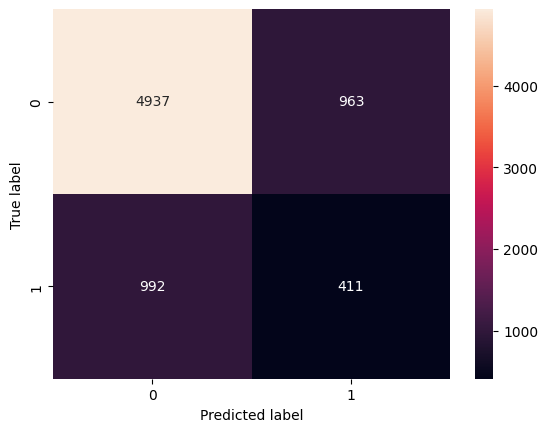

In [ ]:
y_pred_confusion_matrix_rf_tunned = rf_tunned.predict(X_test)
cm = confusion_matrix(y_test, y_pred_confusion_matrix_rf_tunned)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
print(f'Acurácia da rf_tunned Treino: {accuracy_score(y_train, rf_tunned.predict(X_train)):.4f} %')
print(f'Acurácia da rf_tunned Teste: {accuracy_score(y_test, rf_tunned.predict(X_test)):.4f} %')
print('===============================================')
print(f'Acurácia Balanceada da rf_tunned Treino: {balanced_accuracy_score(y_train, rf_tunned.predict(X_train)):.4f} %')
print(f'Acurácia Balanceada da rf_tunned Teste: {balanced_accuracy_score(y_test, rf_tunned.predict(X_test)):.4f} %')
print('===============================================')
print(f'Precisão da rf_tunned Treino: {precision_score(y_train, rf_tunned.predict(X_train)):.4f} %')
print(f'Precisão da rf_tunned Teste: {precision_score(y_test, rf_tunned.predict(X_test)):.4f} %')
print('===============================================')
print(f'Recall da rf_tunned Treino: {recall_score(y_train, rf_tunned.predict(X_train)):.4f} %')
print(f'Recall da rf_tunned Teste: {recall_score(y_test, rf_tunned.predict(X_test)):.4f} %')
print('===============================================')
print(f'F1 da rf_tunned Treino: {f1_score(y_train, rf_tunned.predict(X_train)):.4f} %')
print(f'F1 da rf_tunned Teste: {f1_score(y_test, rf_tunned.predict(X_test)):.4f} %')
print('===============================================')
print(f'ROC AUC da rf_tunned Treino: {roc_auc_score(y_train, rf_tunned.predict_proba(X_train)[:,1]):.4f} %')
print(f'ROC AUC da rf_tunned Teste: {roc_auc_score(y_test, rf_tunned.predict_proba(X_test)[:,1]):.4f} %')

Acurácia da rf_tunned Treino: 0.8425 %
Acurácia da rf_tunned Teste: 0.7323 %
Acurácia Balanceada da rf_tunned Treino: 0.7843 %
Acurácia Balanceada da rf_tunned Teste: 0.5649 %
Precisão da rf_tunned Treino: 0.5781 %
Precisão da rf_tunned Teste: 0.2991 %
Recall da rf_tunned Treino: 0.6894 %
Recall da rf_tunned Teste: 0.2929 %
F1 da rf_tunned Treino: 0.6289 %
F1 da rf_tunned Teste: 0.2960 %
ROC AUC da rf_tunned Treino: 0.8890 %
ROC AUC da rf_tunned Teste: 0.5937 %


comparativo de todos os casos, analisando somente o ROC_AUC e Accuracy

In [ ]:
# Accuracy
print('************************************')
print('--------     Accuracy     ----------')
print('************************************')

print(f'Acurácia da regressao_logistica Treino: {accuracy_score(y_train, lr.predict(X_train)):.4f} %')
print(f'Acurácia da regressao_logistica Teste: {accuracy_score(y_test, lr.predict(X_test)):.4f} %')
print('------------------------------------')

print(f'Acurácia da xgb Treino: {accuracy_score(y_train, xgb.predict(X_train)):.4f} %')
print(f'Acurácia da xgb Teste: {accuracy_score(y_test, xgb.predict(X_test)):.4f} %')
print('------------------------------------')

print(f'Acurácia da xgb_tunned Treino: {accuracy_score(y_train, xgb_tunned.predict(X_train)):.4f} %')
print(f'Acurácia da xgb_tunned Teste: {accuracy_score(y_test, xgb_tunned.predict(X_test)):.4f} %')
print('------------------------------------')

print(f'Acurácia da rf Treino: {accuracy_score(y_train, rf.predict(X_train)):.4f} %')
print(f'Acurácia da rf Teste: {accuracy_score(y_test, rf.predict(X_test)):.4f} %')
print('------------------------------------')

print(f'Acurácia da rf_tunned Treino: {accuracy_score(y_train, rf_tunned.predict(X_train)):.4f} %')
print(f'Acurácia da rf_tunned Teste: {accuracy_score(y_test, rf_tunned.predict(X_test)):.4f} %')

#ROC_AUC
print()
print()
print('************************************')
print('--------      ROC_AUC     ----------')
print('************************************')

print(f'ROC AUC da regressao_logistica Treino: {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1]):.4f} %')
print(f'ROC AUC da regressao_logistica Teste: {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]):.4f} %')
print('------------------------------------')

print(f'ROC AUC da xgb Treino: {roc_auc_score(y_train, xgb.predict_proba(X_train)[:,1]):.4f} %')
print(f'ROC AUC da xgb Teste: {roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1]):.4f} %')
print('------------------------------------')

print(f'ROC AUC da xgb_tunned Treino: {roc_auc_score(y_train, xgb_tunned.predict_proba(X_train)[:,1]):.4f} %')
print(f'ROC AUC da xgb_tunned Teste: {roc_auc_score(y_test, xgb_tunned.predict_proba(X_test)[:,1]):.4f} %')
print('------------------------------------')

print(f'ROC AUC da rf Treino: {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1]):.4f} %')
print(f'ROC AUC da rf Teste: {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]):.4f} %')
print('------------------------------------')

print(f'ROC AUC da rf_tunned Treino: {roc_auc_score(y_train, rf_tunned.predict_proba(X_train)[:,1]):.4f} %')
print(f'ROC AUC da rf_tunned Teste: {roc_auc_score(y_test, rf_tunned.predict_proba(X_test)[:,1]):.4f} %')

************************************
--------     Accuracy     ----------
************************************
Acurácia da regressao_logistica Treino: 0.8065 %
Acurácia da regressao_logistica Teste: 0.8079 %
------------------------------------
Acurácia da xgb Treino: 0.8287 %
Acurácia da xgb Teste: 0.8088 %
------------------------------------
Acurácia da xgb_tunned Treino: 0.8065 %
Acurácia da xgb_tunned Teste: 0.8079 %
------------------------------------
Acurácia da rf Treino: 0.9945 %
Acurácia da rf Teste: 0.8395 %
------------------------------------
Acurácia da rf_tunned Treino: 0.8425 %
Acurácia da rf_tunned Teste: 0.7323 %
------------------------------------


************************************
--------      ROC_AUC     ----------
************************************
ROC AUC da regressao_logistica Treino: 0.5127 %
ROC AUC da regressao_logistica Teste: 0.5065 %
------------------------------------
ROC AUC da xgb Treino: 0.8583 %
ROC AUC da xgb Teste: 0.5766 %
---------------